In [7]:
import pickle


with open('./DF_v3.pkl', 'rb') as f:
    df = pickle.load(f)

In [8]:
df.head()

,level_0,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,songid,speechiness,tempo,time_signature,track,valence,genres
0,0,0.001300,Karkkiautomaatti,0.487,157307.0,0.678,0.055100,9.0,0.0846,-7.780,1.0,5PS5dpaLogPzYU9hWiWyZb,0.0495,149.940,4.0,Tanssi vaan,0.870,"['finnish indie', 'suomi rock']"
1,1,0.000045,Hudson Mohawke,0.662,138960.0,0.823,0.952000,4.0,0.3430,-1.711,0.0,41RpZW2lxAdnqDd2nMBzLQ,0.0662,177.745,4.0,No One Could Ever,0.621,"['bass music', 'scottish electronic', 'scottis..."
4,4,0.002760,Kris Kross,0.859,221200.0,0.741,0.000000,11.0,0.3250,-12.329,0.0,3GsS8jzoixpCnp4jDWCEvb,0.2710,98.082,4.0,2 Da Beat Ch'yall,0.529,"['hip hop', 'new jack swing', 'rap']"
5,5,0.348000,Jorge Negrete,0.361,173573.0,0.483,0.000003,7.0,0.1770,-6.875,1.0,0kq75szR7uDEYrZkT2c4Ry,0.0287,94.538,4.0,El hijo del pueblo,0.682,"['bolero', 'mariachi', 'ranchera']"
6,6,0.340000,Tiger Lou,0.533,318467.0,0.302,0.179000,10.0,0.1110,-10.308,1.0,2HyFpkX9J7vv3OZNDaraHZ,0.0307,134.959,3.0,Pilots,0.294,['swedish indie rock']


In [9]:
df["genres"].value_counts()

['baroque', 'classical', 'early music', 'german baroque']       3654
['classical', 'classical era']                                  1907
['cartoon','children's music']                                  1468
['smooth jazz']                                                 1274
['edm', 'progressive house', 'trance']                          1131
                                                                ... 
['birmingham hip hop', 'uk hip hop']                               1
['german techno', 'minimal techno', 'schranz', 'tech house']       1
['cedm', 'electronica cristiana']                                  1
['doomcore', 'power noise']                                        1
['trad jazz catala']                                               1
Name: genres, Length: 20720, dtype: int64

In [10]:
all_genres = []
for genre_list in df["genres"]:
    genre_list = genre_list.split(",")
    for genre in genre_list:
        genre = genre.strip("[",)
        genre = genre.strip("]",)
        genre = genre.strip()
        all_genres.append(genre)

In [12]:
len(all_genres)

2110517

In [5]:
import pandas as pd
import numpy as np

In [6]:
df_genres = pd.DataFrame(all_genres,columns=['genres'])

In [50]:
df_genres["genres"].value_counts()

'rock'                             22625
'mellow gold'                      12409
'dance pop'                        12358
'country rock'                     12306
'soft rock'                        12065
                                   ...  
'french contemporary classical'        1
'viola'                                1
'manele'                               1
'coptic hymn'                          1
'dragspel'                             1
Name: genres, Length: 3488, dtype: int64

# Feature Engineering

Goal - have only the highest occuring genre in 'genres' column.

In [43]:
df_genres["genres"].value_counts()[0:4]

'rock'            22625
'mellow gold'     12409
'dance pop'       12358
'country rock'    12306
Name: genres, dtype: int64

In [48]:
df["genres"][0:1]

0    ['finnish indie', 'suomi rock']
Name: genres, dtype: object

In [67]:
((df_genres["genres"].value_counts().index=='rock').tolist()).index(False)

0

In [8]:
unique_genres = set(df_genres["genres"])

In [9]:
len(unique_genres)

3488

In [10]:
df_genres

,genres
0,'finnish indie'
1,'suomi rock'
2,'bass music'
3,'scottish electronic'
4,'scottish hip hop'
...,...
2110512,'stomp and holler'
2110513,'ccm'
2110514,'christian music'
2110515,'world worship'


In [39]:
df.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,songid,speechiness,tempo,time_signature,track,valence,genres
0,0.000962,Karkkiautomaatti,0.360344,157307.0,0.501670,0.040770,9.0,0.062598,-7.780,1.0,5PS5dpaLogPzYU9hWiWyZb,0.036626,0.444028,4.0,Tanssi vaan,0.643736,"['finnish indie', 'suomi rock']"
1,0.000026,Hudson Mohawke,0.379957,138960.0,0.472364,0.546404,4.0,0.196866,-1.711,0.0,41RpZW2lxAdnqDd2nMBzLQ,0.037996,0.408300,4.0,No One Could Ever,0.356425,"['bass music', 'scottish electronic', 'scottis..."
4,0.002002,Kris Kross,0.623189,221200.0,0.537582,0.000000,11.0,0.235782,-12.329,0.0,3GsS8jzoixpCnp4jDWCEvb,0.196606,0.284787,4.0,2 Da Beat Ch'yall,0.383780,"['hip hop', 'new jack swing', 'rap']"
5,0.328076,Jorge Negrete,0.340331,173573.0,0.455346,0.000003,7.0,0.166866,-6.875,1.0,0kq75szR7uDEYrZkT2c4Ry,0.027057,0.356702,4.0,El hijo del pueblo,0.642953,"['bolero', 'mariachi', 'ranchera']"
6,0.355561,Tiger Lou,0.557394,318467.0,0.315822,0.187192,10.0,0.116080,-10.308,1.0,2HyFpkX9J7vv3OZNDaraHZ,0.032105,0.564862,3.0,Pilots,0.307456,['swedish indie rock']


# Feature Hashing

In [11]:
from sklearn.feature_extraction import FeatureHasher

In [19]:
fh = FeatureHasher(n_features=50, input_type='string')
hashed_features = fh.fit_transform(df['genres'])
hashed_features = hashed_features.toarray()
pd.concat([df[['track', 'genres']], pd.DataFrame(hashed_features)], 
          axis=1)

,track,genres,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,Tanssi vaan,"['finnish indie', 'suomi rock']",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,2.0,-3.0,0.0,0.0,0.0,0.0,-2.0
1,No One Could Ever,"['bass music', 'scottish electronic', 'scottis...",2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.0,5.0,7.0,-4.0,-1.0,0.0,0.0,0.0,-7.0
2,NaN,NaN,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-3.0,0.0,1.0,-2.0,-1.0,0.0,0.0,0.0,-1.0
3,NaN,NaN,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,1.0,2.0,-1.0,2.0,0.0,0.0,0.0,0.0
4,2 Da Beat Ch'yall,"['hip hop', 'new jack swing', 'rap']",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728150,Two Slow Dancers,"['art pop', 'brooklyn indie', 'chamber pop', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728151,Boy,['lo-fi beats'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728152,Truck I Drove in High School,"['contemporary country', 'country pop', 'heart...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728153,Goodnight Tennessee,"['garage rock', 'indie pop', 'indie rock', 'mo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Genre Clustering

In [20]:
df.head()

,level_0,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,songid,speechiness,tempo,time_signature,track,valence,genres
0,0,0.001300,Karkkiautomaatti,0.487,157307.0,0.678,0.055100,9.0,0.0846,-7.780,1.0,5PS5dpaLogPzYU9hWiWyZb,0.0495,149.940,4.0,Tanssi vaan,0.870,"['finnish indie', 'suomi rock']"
1,1,0.000045,Hudson Mohawke,0.662,138960.0,0.823,0.952000,4.0,0.3430,-1.711,0.0,41RpZW2lxAdnqDd2nMBzLQ,0.0662,177.745,4.0,No One Could Ever,0.621,"['bass music', 'scottish electronic', 'scottis..."
4,4,0.002760,Kris Kross,0.859,221200.0,0.741,0.000000,11.0,0.3250,-12.329,0.0,3GsS8jzoixpCnp4jDWCEvb,0.2710,98.082,4.0,2 Da Beat Ch'yall,0.529,"['hip hop', 'new jack swing', 'rap']"
5,5,0.348000,Jorge Negrete,0.361,173573.0,0.483,0.000003,7.0,0.1770,-6.875,1.0,0kq75szR7uDEYrZkT2c4Ry,0.0287,94.538,4.0,El hijo del pueblo,0.682,"['bolero', 'mariachi', 'ranchera']"
6,6,0.340000,Tiger Lou,0.533,318467.0,0.302,0.179000,10.0,0.1110,-10.308,1.0,2HyFpkX9J7vv3OZNDaraHZ,0.0307,134.959,3.0,Pilots,0.294,['swedish indie rock']


# Embedding

In [23]:
import ast
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import MeanShift, KMeans, AffinityPropagation, AgglomerativeClustering, FeatureAgglomeration, SpectralClustering, estimate_bandwidth
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, v_measure_score

In [21]:
df.drop(['level_0'], axis=1, inplace=True)
audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
df.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,songid,speechiness,tempo,time_signature,track,valence,genres
0,0.001300,Karkkiautomaatti,0.487,157307.0,0.678,0.055100,9.0,0.0846,-7.780,1.0,5PS5dpaLogPzYU9hWiWyZb,0.0495,149.940,4.0,Tanssi vaan,0.870,"['finnish indie', 'suomi rock']"
1,0.000045,Hudson Mohawke,0.662,138960.0,0.823,0.952000,4.0,0.3430,-1.711,0.0,41RpZW2lxAdnqDd2nMBzLQ,0.0662,177.745,4.0,No One Could Ever,0.621,"['bass music', 'scottish electronic', 'scottis..."
4,0.002760,Kris Kross,0.859,221200.0,0.741,0.000000,11.0,0.3250,-12.329,0.0,3GsS8jzoixpCnp4jDWCEvb,0.2710,98.082,4.0,2 Da Beat Ch'yall,0.529,"['hip hop', 'new jack swing', 'rap']"
5,0.348000,Jorge Negrete,0.361,173573.0,0.483,0.000003,7.0,0.1770,-6.875,1.0,0kq75szR7uDEYrZkT2c4Ry,0.0287,94.538,4.0,El hijo del pueblo,0.682,"['bolero', 'mariachi', 'ranchera']"
6,0.340000,Tiger Lou,0.533,318467.0,0.302,0.179000,10.0,0.1110,-10.308,1.0,2HyFpkX9J7vv3OZNDaraHZ,0.0307,134.959,3.0,Pilots,0.294,['swedish indie rock']


In [32]:
df[audio_cols]

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.001300,0.487,0.678,0.055100,0.0846,0.0495,149.940,0.8700
1,0.000045,0.662,0.823,0.952000,0.3430,0.0662,177.745,0.6210
4,0.002760,0.859,0.741,0.000000,0.3250,0.2710,98.082,0.5290
5,0.348000,0.361,0.483,0.000003,0.1770,0.0287,94.538,0.6820
6,0.340000,0.533,0.302,0.179000,0.1110,0.0307,134.959,0.2940
...,...,...,...,...,...,...,...,...
728150,0.798000,0.320,0.104,0.000750,0.1060,0.0342,124.677,0.0566
728151,0.820000,0.418,0.204,0.936000,0.0866,0.0370,110.022,0.0375
728152,0.070400,0.614,0.952,0.000000,0.3620,0.0718,148.079,0.8200
728153,0.064000,0.343,0.487,0.000000,0.1070,0.0473,171.217,0.3650


In [34]:
# scale tempo
tempo = df['tempo'].values.reshape(-1,1)
df['tempo'] = MinMaxScaler().fit_transform(tempo)

# normalize audio columns
norm = Normalizer()
df[audio_cols] = norm.fit_transform(df[audio_cols])

Text(0.5, 1.0, 'Elbow Method')

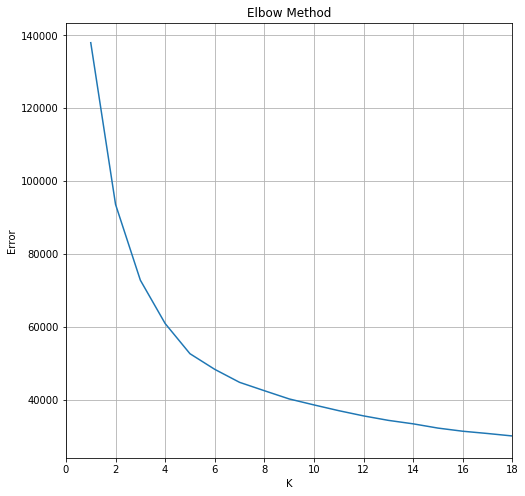

In [35]:
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']]

Ks = np.arange(1, 20)
km = [KMeans(n_clusters=i, random_state=1986) for i in Ks]
score = [-km[i].fit(X).score(X) for i in range(len(km))]
Ks.dtype = int
plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

In [36]:
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']]

km = KMeans(n_clusters=9, n_init=10, random_state=1986)
km.fit(X)
labels = km.labels_
cluster_centers = km.cluster_centers_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)
km_clusters = pd.DataFrame(cluster_centers, columns=audio_cols)
km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
km_clusters['method'] = 'KMeans'
clusters = km_clusters
cols = ['cluster'] + audio_cols + ['method']
clusters = clusters[cols]


In [37]:
clusters

,cluster,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,method
0,KM0,0.140058,0.577151,0.512305,0.019204,0.138554,0.098109,0.444918,0.288561,KMeans
1,KM1,0.702499,0.385325,0.213720,0.025842,0.153634,0.052162,0.378936,0.240010,KMeans
2,KM2,0.086019,0.427486,0.446193,0.490733,0.106799,0.044227,0.331467,0.421888,KMeans
3,KM3,0.041112,0.308417,0.558350,0.562198,0.167646,0.056523,0.369047,0.155223,KMeans
4,KM4,0.083248,0.477370,0.525283,0.013943,0.121760,0.068496,0.349469,0.548497,KMeans
5,KM5,0.448701,0.451748,0.381959,0.020241,0.132394,0.066642,0.352356,0.482130,KMeans
6,KM6,0.025785,0.331385,0.713969,0.031881,0.169275,0.072308,0.437783,0.306703,KMeans
7,KM7,0.587043,0.264618,0.171746,0.574775,0.113270,0.037104,0.302823,0.176384,KMeans
8,KM8,0.172245,0.332342,0.500851,0.031215,0.516869,0.103772,0.335881,0.320708,KMeans


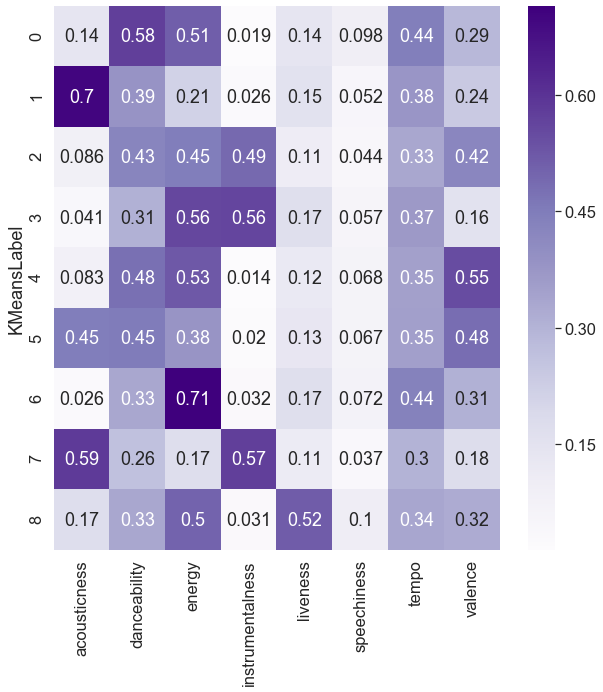

In [38]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(
    data=clusters.loc[clusters.method=='KMeans', audio_cols],
    cmap='Purples',
    annot=True
)
plt.ylabel("KMeansLabel")
plt.savefig('heatmap_all.png')